# Unique ID: #426qsm76

# Data Science Assessment for Gtmhub


_Thank you for your interest in Gtmhub! To better help us assess our many applications we have the following assessment below. This assessment can be completed anytime in the next 3 business days, and you are able to use any resources at your discretion. We are looking for clear communication and a comprehensive understanding. You may be asked to dive further or articulate these skills in an interview following the assessment. To help us reduce bias, please do not use your name in file names, or anywhere in your documents you return (Scripts or word documents). Please ensure that all documents you return have the same unique ID that is displayed in the upper right-hand corner. This ID will be how we connect your assessment back to you. Again, we look forward to seeing your results! Thank you for your time and consideration to work here at Gtmhub._

___Skills test 1:__
    Use the Gini Index data in gini.csv. This data is Gini index data per country per year. Use either Stata, R, or Python and preprocess this data to be tabular. Send back the script and ensure your ID from the header above is in the first line. Do not put your name in the file name or the script itself._

___Skills test 2:__
    Use the SpeedDating file attached to write a script that will perform one of the options below. You can use any library in either Stata, R, or Python.  There are 195 columns and attached is also a column explanation document. You can perform your analysis on any column(s) of your choice._
    
>Multivariate Analysis<br>
>Principal Component Analysis<br>
>Cox PH<br>
>Clustering<br>
>Segmentation<br>
>MANOVA<br>
    
_After you have completed your statistics, please supply a short-written (1 – 2 paragraph) analysis to explain your report. You may also supply a graph(s) to support your findings. (The primary focus is both the skill of the scripting and a clear and concise communication of the analysis). A meaningful insight is not mandatory, understanding how to use statistics and how to validate your findings is the key._

## Skill test 1: tabulate the Gini index data

__Some background info on the Gini index:__
A statistical index used to measure inequality within a given country which allows direct
comparision between countries. 

__Goal of the processing is to tabulate a dataset.__ In my experience, the reason why you 
want to tabulate a dataset is that you want to use it for statistical analysis. Therefore
you want to preproces it in such a way that it becomes usable (no missing values, go from
wide to long format etc) 

Todo

- [x] load the data
- [x] describe the dataset and preprocess layout
- [x] deal with missing values
- [x] export the data to csv format

### Import modules

In [1]:
import pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Load the data

In [2]:
df = pd.read_csv("data/gini.csv")

### Describe the dataset and go from wide to long


Dimenion of the dataset:
 (227, 31)

Number of Nulls and datatypes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GINI index  227 non-null    object 
 1   1978        0 non-null      float64
 2   1979        1 non-null      float64
 3   1980        1 non-null      float64
 4   1981        4 non-null      float64
 5   1982        2 non-null      float64
 6   1983        1 non-null      float64
 7   1984        3 non-null      float64
 8   1985        8 non-null      float64
 9   1986        8 non-null      float64
 10  1987        15 non-null     float64
 11  1988        22 non-null     float64
 12  1989        13 non-null     float64
 13  1990        10 non-null     float64
 14  1991        11 non-null     float64
 15  1992        23 non-null     float64
 16  1993        31 non-null     float64
 17  1994        18 non-null     float64
 18  

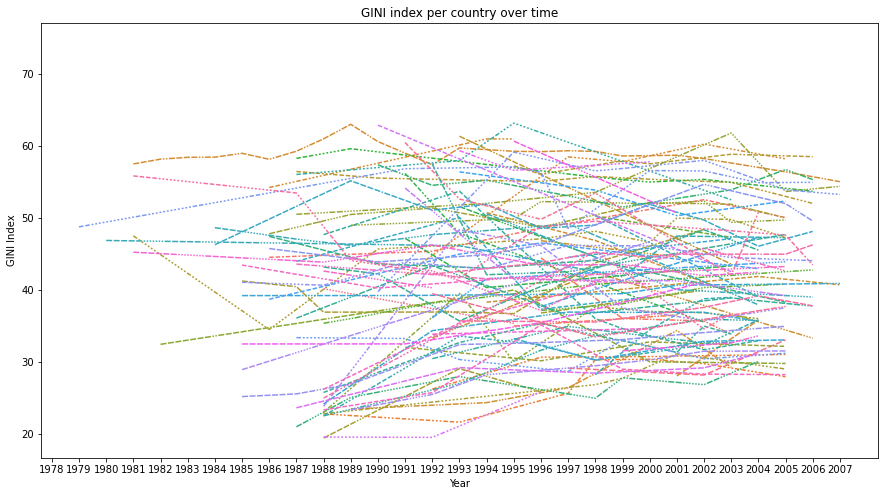

In [3]:
# Print some basics of the data
print("\nDimenion of the dataset:\n", df.shape)
print("\nNumber of Nulls and datatypes:\n")
print(df.info())
print("\nFirst 5 rows:\n", df.head())

# Go from wide to long
year_cols = list(df.select_dtypes("number"))
df_wide = pd.melt(
    df,
    id_vars=["GINI index"],
    value_vars=year_cols,
    var_name="Year",
    value_name="GINI Index",
).rename(columns={"GINI index": "Country"})

print("\nNumber of Countries original:\n", df_wide["Country"].nunique())

# Visualize the data
print("\nVisualize the data:\n")
fig = plt.figure(figsize=(15, 8))
g = sns.lineplot(
    data=df_wide, x="Year", y="GINI Index", hue="Country", style="Country", legend=False
).set_title("GINI index per country over time")

# Conclusion
# We have data for 227 countries and 31 years but as is clear
# from the null counts, a lot of data is missing per country.

# What to do with the missing values and what to do with
# those countries for which all data is missing? Given that
# we are dealing with a timeseries, simple imputation using
# the mean/mode/median is a bad idea so for those I'm going to
# use backwards and forwards filling. For those countries where
# where we have no observations I'm going to remove them from
# the dataset all together as models can't deal with those
# anyways.

### Dealing with missing values


Number of countries remaining:
 142


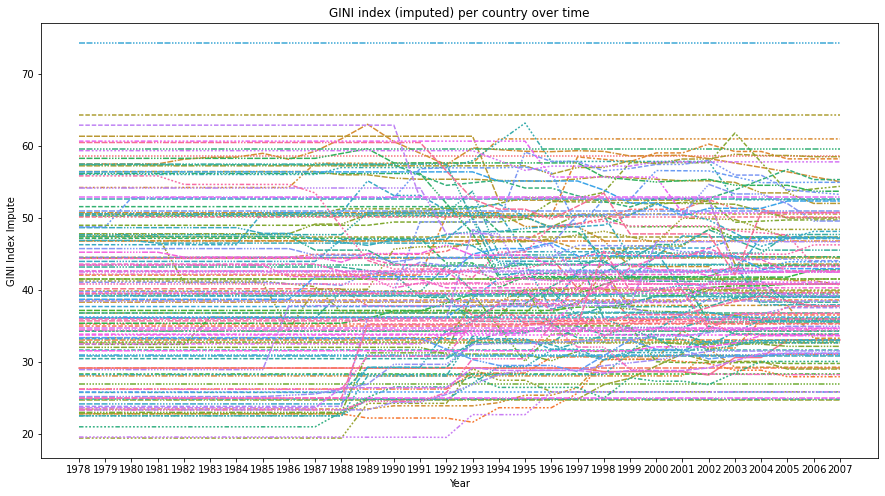

In [4]:
# Impute the missing values where possible
# First backwards, then forwards and where possible take the average of the two methods
df_wide["GINI Index Impute_back"] = df_wide.groupby(["Country"])["GINI Index"].fillna(
    method="bfill"
)
df_wide["GINI Index Impute_forward"] = df_wide.groupby(["Country"])[
    "GINI Index"
].fillna(method="ffill")
df_wide["GINI Index Impute"] = df_wide[
    ["GINI Index Impute_back", "GINI Index Impute_forward"]
].mean(axis=1)

# Create a boolean column where we keep track of which values were imputed or not
# This can be added as additional information when fitting a model in such a way that you give
# more value to the non-imputed values vs the imputed values.
df_wide["Value Imputed"] = df_wide["GINI Index"].isnull()


# For some countries we just don't have any data. Therefore we are going to drop them completely
df_wide.dropna(subset=["GINI Index Impute"], inplace=True)
# Clean up the dataframe
df_wide.drop(
    columns=["GINI Index Impute_back", "GINI Index Impute_forward"],
    inplace=True,
)
# And reset the index after dropping the missing value rows
df_wide = df_wide.reset_index(drop=True)

# How many countries are left in the dataset?
print("\nNumber of countries remaining:\n", df_wide["Country"].nunique())

# How does the cleaned up data look like?
fig = plt.figure(figsize=(15, 8))
g = sns.lineplot(
    data=df_wide,
    x="Year",
    y="GINI Index Impute",
    hue="Country",
    style="Country",
    legend=False,
).set_title("GINI index (imputed) per country over time")

# Oke the data seems to be in a format that I would start to feed a model with it.

### Exporting the dataset

In [5]:
# Depending on the intended receiver of the file I would either export
# the dataframe as a pickle file or a csv. When a dataset is large
# and the receiver stays in python then I would definetly prefer pickle
# as it is much quicker to save it and has the benefit that all your
# datatypes (like specific datatypes) are kept intact when loading the
# file again. For now I'll just do both:

# Pickle file:
with open("output/Skill_test_1_#426qsm76-df-GINI", "wb") as f:
    pickle.dump("df_wide", f)

# CSV
df_wide.to_csv("output/Skill_test_1_#426qsm76-df-GINI.csv")

## Skill test 2 Speed dating
   __Some background info on the dataset:__ Over a period of 1 1/2 years 21 rounds of speed dating where held. The participants had to fill out a number of forms to indicate their initial preferences, the rating of the person with whom they had a speed date, a follow up questionnaire on whether they actually went on a date etc.  
   
   __Type of analysis:__ Multivariate analysis where specifically I'm going to try to predict the outcome of a speed date (match or no match)
   
  Todo

- [x] load the data
- [x] describe the dataset 
- [x] data cleaning
- [x] feature enginering
- [x] modeling
- [x] Summarize in 1/2 paragraphs

### Import modules

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix
)
from sklearn.model_selection import (
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Load the data

In [7]:
df = pd.read_csv(
    "data/SpeedDating.csv",
    encoding="Latin",
)

### Basic description

In [8]:
# Print some basics of the data
print("\nDimenion of the dataset:\n", df.shape)
print("\nPrint datatypes:\n")
print(df.info())
print("\nFirst 10 rows and all columns:\n")
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(df.head(10))

# First observations:
# Not a lot of rows compared to the number of columns,
# Most columns are integers (or floats), 8 of them are mixed (or strings)
# Looking at the column headers there are a lot of columns that are not
# explictely described in the code book and not all columns are that well
# filled.


Dimenion of the dataset:
 (8378, 195)

Print datatypes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB
None

First 10 rows and all columns:



,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

### Data cleaning

In [9]:
# Given the timewindow of this project (3 days) I've decided to be pretty rigorous
# when it comes to data cleaning.

print("\nOriginal number of columns:\n", df.shape[1])

# 1) Dropping all object columns that have a lot of categories (> 20) since one-hot
# encoding is possible but pretty unlikely that those columns, given the number of
# observations, are really going to be informative.
df_object_cols = list(df.select_dtypes(include=[object]).columns)
print(
    "\nNumber of unique categories per category column:\n", df[df_object_cols].nunique()
)

# Oke that pretty much drops all of them.
df_select = df.drop(columns=df_object_cols)
print("\nNumber of Columns after step1:\n", df_select.shape[1])

# 2) Lets drop a number of columns that have more than 25% NaN's as one can wonder
# what type of selection bias you introduce if you later filter on NaNs
df_select.dropna(thresh=df_select.shape[0] * 0.25, how="all", axis=1, inplace=True)
print("\nNumber of Columns after step2:\n", df_select.shape[1])

# 3) Lets also remove all columns for which we don't have a description in the
# code book. Normally the first thing to do is to email the person from who you
# got the data to see if they know anything more. But for now, lets remove them:
columns_in_speeddatingkey = [
    "iid",
    "id",
    "gender",
    "idg",
    "condtn",
    "wave",
    "round",
    "position",
    "positin1",
    "order",
    "partner",
    "pid",
    "match",
    "int_corr",
    "samerace",
    "age_o",
    "race_o",
    "pf_o_att",
    "dec_o",
    "attr_o",
    "age",
    "field",
    "field_cd",
    "undergrd",
    "mm_sat",
    "tuition",
    "race",
    "imprace",
    "imprelig",
    "from",
    "zipcode",
    "income",
    "goal",
    "date",
    "go_out",
    "career",
    "career_c",
    "sports",
    "tvsports",
    "excersice",
    "dining",
    "museums",
    "art",
    "hiking",
    "gaming",
    "clubbing",
    "reading",
    "tv",
    "theater",
    "movies",
    "concerts",
    "music",
    "shopping",
    "yoga",
    "exphappy",
    "expnum",
    "attr1_1",
    "sinc1_1",
    "intel1_1",
    "fun1_1",
    "amb1_1",
    "shar1_1",
    "attr4_1",
    "sinc4_1",
    "intel4_1",
    "fun4_1",
    "amb4_1",
    "shar4_1",
    "attr2_1",
    "sinc2_1",
    "intel2_1",
    "fun2_1",
    "amb2_1",
    "shar2_1",
    "attr3_1",
    "sinc3_1",
    "intel3_1",
    "fun3_1",
    "amb3_1",
    "attr5_1",
    "sinc5_1",
    "int5_1",
    "fun5_1",
    "amb5_1",
    "attr1_s",
    "sinc1_s",
    "intel1_s",
    "fun1_s",
    "amb1_s",
    "shar1_s",
    "attr3_s",
    "sinc3_s",
    "intel3_s",
    "fun3_s",
    "amb3_s",
    "satis_2",
    "length",
    "numdat_2",
    "attr7_2",
    "sinc7_2",
    "intel7_2",
    "fun7_2",
    "amb7_2",
    "shar7_2",
    "attr1_2",
    "sinc1_2",
    "intel1_2",
    "fun1_2",
    "amb1_2",
    "shar1_2",
    "attr4_2",
    "sinc4_2",
    "intel4_2",
    "fun4_2",
    "amb4_2",
    "shar4_2",
    "attr2_2",
    "sinc2_2",
    "intel2_2",
    "fun2_2",
    "amb2_2",
    "shar2_2",
    "attr3_2",
    "sinc3_2",
    "int3_2",
    "fun3_2",
    "amb3_2",
    "attr5_2",
    "sinc5_2",
    "int5_2",
    "fun5_2",
    "amb5_2",
    "you_call",
    "them_call",
    "date_3",
    "numdat_3",
    "num_in_3",
    "attr1_3",
    "sinc1_3",
    "intel1_3",
    "fun1_3",
    "amb1_3",
    "shar1_3",
    "attr7_3",
    "sinc7_3",
    "intel7_3",
    "fun7_3",
    "amb7_3",
    "shar7_3",
    "attr4_3",
    "sinc4_3",
    "intel4_3",
    "fun4_3",
    "amb4_3",
    "shar4_3",
    "attr2_3",
    "sinc2_3",
    "intel2_3",
    "fun2_3",
    "amb2_3",
    "shar2_3",
    "attr3_3",
    "sinc3_3",
    "intel3_3",
    "fun3_3",
    "amb3_3",
    "shar3_3",
    "attr5_3",
    "sinc5_3",
    "int5_3",
    "fun5_3",
    "amb5_3",
]
df_select = df_select[
    df_select.columns[df_select.columns.isin(columns_in_speeddatingkey)]
]
print("\nNumber of Columns after step3:\n", df_select.shape[1])

# 4) All attribute ratings that follow the first are excluded as these might have changed after
# having a few dates and are therefore not informative for the first half of the night. The
# attribute ratings after they have seen the number of matches might also be influenced so
# to keep it as clean as possible we are only going to keep the initial attribute rating:
attribute_future_questions = [
    "attr1_s",
    "sinc1_s",
    "intel1_s",
    "fun1_s",
    "amb1_s",
    "shar1_s",
    "attr3_s",
    "sinc3_s",
    "intel3_s",
    "fun3_s",
    "amb3_s",
    "satis_2",
    "attr7_2",
    "sinc7_2",
    "intel7_2",
    "fun7_2",
    "amb7_2",
    "shar7_2",
    "attr1_2",
    "sinc1_2",
    "intel1_2",
    "fun1_2",
    "amb1_2",
    "shar1_2",
    "attr4_2",
    "sinc4_2",
    "intel4_2",
    "fun4_2",
    "amb4_2",
    "shar4_2",
    "attr2_2",
    "sinc2_2",
    "intel2_2",
    "fun2_2",
    "amb2_2",
    "shar2_2",
    "attr3_2",
    "sinc3_2",
    "int3_2",
    "fun3_2",
    "amb3_2",
    "attr5_2",
    "sinc5_2",
    "int5_2",
    "fun5_2",
    "amb5_2",
    "attr1_3",
    "sinc1_3",
    "intel1_3",
    "fun1_3",
    "amb1_3",
    "shar1_3",
    "attr7_3",
    "sinc7_3",
    "intel7_3",
    "fun7_3",
    "amb7_3",
    "shar7_3",
    "attr4_3",
    "sinc4_3",
    "intel4_3",
    "fun4_3",
    "amb4_3",
    "shar4_3",
    "attr2_3",
    "sinc2_3",
    "intel2_3",
    "fun2_3",
    "amb2_3",
    "shar2_3",
    "attr3_3",
    "sinc3_3",
    "intel3_3",
    "fun3_3",
    "amb3_3",
    "shar3_3",
    "attr5_3",
    "sinc5_3",
    "int5_3",
    "fun5_3",
    "amb5_3",
]
df_select = df_select[
    df_select.columns[~df_select.columns.isin(attribute_future_questions)]
]
print("\nNumber of Columns after step4:\n", df_select.shape[1])

# 5) Similarly I'm going to remove the columns that include information on how many of the
# matches led to an actual date. These values are conditional on having an actual match
# and therefore contain information of the future and you do not want to have that in
# the model when trying to predict a match that still has to occure:
future_date_questions = [
    "you_call",
    "them_call",
    "date_3",
    "numdat_3",
    "num_in_3",
]
df_select = df_select[df_select.columns[~df_select.columns.isin(future_date_questions)]]
print("\nNumber of Columns after step5:\n", df_select.shape[1])

# 6) Seperate interest columns vs a single correlation. Both collection of columns
# contain information based on the same responses so I would only pick a single one.
# Due to time limits I've chosen for the single correlational value:
interest_questions = [
    "sports",
    "tvsports",
    "excersice",
    "dining",
    "museums",
    "art",
    "hiking",
    "gaming",
    "clubbing",
    "reading",
    "tv",
    "theater",
    "movies",
    "concerts",
    "music",
    "shopping",
    "yoga",
]
df_select = df_select[df_select.columns[~df_select.columns.isin(interest_questions)]]
print("\nNumber of Columns after step6:\n", df_select.shape[1])

# 7) I'm going to remove a number of columns that are informative
# for the session schedule but not so much for a match:
procedural_columns = [
    "iid",
    "id",
    "idg",
    "wave",
    "position",
    "positin1",
    "partner",
    "pid",
]
df_select = df_select[df_select.columns[~df_select.columns.isin(procedural_columns)]]
print("\nNumber of Columns after step7:\n", df_select.shape[1])

# 8) Finally, now that all columns are removed that I didn't directly care for I'm
# going to remove all rows that have a NaN value in any of the columns:
print("\nNumber of Rows before step8:\n", df_select.shape[0])
df_select.dropna(inplace=True)
print("\nNumber of Rows after step8:\n", df_select.shape[0])
# That is still pretty harsh and might benefit from recoding the career_c column
# in a more precise manner using methods like fuzzy matching.

# Ensure the index is reset
df_select = df_select.reset_index(drop=True)


Original number of columns:
 195

Number of unique categories per category column:
 field       259
undergra    241
mn_sat       68
tuition     115
from        269
zipcode     409
income      261
career      367
dtype: int64

Number of Columns after step1:
 187

Number of Columns after step2:
 166

Number of Columns after step3:
 137

Number of Columns after step4:
 77

Number of Columns after step5:
 75

Number of Columns after step6:
 59

Number of Columns after step7:
 51

Number of Rows before step8:
 8378

Number of Rows after step8:
 4087


### Feature engineering

In [10]:
### Feature enginering
# 1) One-Hot encode a number of categorical columns
categorical_cols = [
    "gender",
    "condtn",
    "samerace",
    "race_o",
    "goal",
    "career_c",
    "length",
    "numdat_2",
    "dec_o",
    "field_cd",
]
df_select_feature = pd.get_dummies(df_select, columns=categorical_cols)
print("\nNumber of Columns after step1:\n", df_select_feature.shape[1])

# 2) Run a PCA over all those attractive ratings of the first rating and only keep the first 3 components
attribute_pca_cols = [
    "attr1_1",
    "sinc1_1",
    "intel1_1",
    "fun1_1",
    "amb1_1",
    "shar1_1",
    "attr4_1",
    "sinc4_1",
    "intel4_1",
    "fun4_1",
    "amb4_1",
    "shar4_1",
    "attr2_1",
    "sinc2_1",
    "intel2_1",
    "fun2_1",
    "amb2_1",
    "shar2_1",
    "attr3_1",
    "sinc3_1",
    "intel3_1",
    "fun3_1",
    "amb3_1",
    "attr5_1",
    "sinc5_1",
    "int5_1",
    "fun5_1",
]
pca = PCA(n_components=3)
df_pca = pd.DataFrame(
    pca.fit_transform(
        df_select_feature[
            df_select_feature.columns[
                df_select_feature.columns.isin(attribute_pca_cols)
            ]
        ]
    )
)
df_pca.rename(
    columns={
        0: "PCA1_attribute",
        1: "PCA2_attribute",
        2: "PCA3_attribute",
    },
    inplace=True,
)
# Merge the PCA df with the df:
df_select_feature = pd.concat([df_select_feature, df_pca], axis=1)
# Drop the original attribute columns:
df_select_feature = df_select_feature[
    df_select_feature.columns[~df_select_feature.columns.isin(attribute_pca_cols)]
]
print("\nNumber of Columns after step2:\n", df_select_feature.shape[1])


Number of Columns after step1:
 98

Number of Columns after step2:
 75


In [11]:
# How does the processed data look like?
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(df_select_feature.head(10))

,round,order,match,int_corr,age_o,pf_o_att,attr_o,age,race,imprace,imprelig,date,go_out,exphappy,amb5_1,gender_0,gender_1,condtn_1,condtn_2,samerace_0,samerace_1,race_o_1.0,race_o_2.0,race_o_3.0,race_o_4.0,race_o_6.0,goal_1.0,goal_2.0,goal_3.0,goal_4.0,goal_5.0,goal_6.0,career_c_1.0,career_c_2.0,career_c_3.0,career_c_4.0,career_c_5.0,career_c_6.0,career_c_7.0,career_c_9.0,career_c_10.0,career_c_11.0,career_c_12.0,career_c_13.0,career_c_15.0,career_c_16.0,career_c_17.0,length_1.0,length_2.0,length_3.0,numdat_2_1.0,numdat_2_2.0,numdat_2_3.0,dec_o_0,dec_o_1,field_cd_1.0,field_cd_2.0,field_cd_3.0,field_cd_4.0,field_cd_5.0,field_cd_6.0,field_cd_7.0,field_cd_8.0,field_cd_9.0,field_cd_10.0,field_cd_11.0,field_cd_13.0,field_cd_14.0,field_cd_15.0,field_cd_16.0,field_cd_17.0,field_cd_18.0,PCA1_attribute,PCA2_attribute,PCA3_attribute
0,9,7,0,0.43,27.0,20.0,6.0,22.0,6.0,1.0,5.0,7.0,3.0,5.0,10.0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.568193,-46.200527,16.285318
1,9,4,0,0.46,28.0,20.0,6.0,22.0,6.0,1.0,5.0,7.0,3.0,5.0,10.0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.568193,-46.200527,16.285318
2,9,6,0,0.05,32.0,18.0,8.0,22.0,6.0,1.0,5.0,7.0,3.0,5.0,10.0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.568193,-46.200527,16.285318
3,9,2,0,0.44,25.0,35.0,3.0,22.0,6.0,1.0,5.0,7.0,3.0,5.0,10.0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.568193,-46.200527,16.285318
4,9,9,0,-0.20,25.0,20.0,3.0,22.0,6.0,1.0,5.0,7.0,3.0,5.0,10.0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.568193,-46.200527,16.285318
5,9,3,0,0.23,27.0,25.0,5.0,22.0,6.0,1.0,5.0,7.0,3.0,5.0,10.0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.568193,-46.200527,16.285318
6,9,5,0,0.30,33.0,22.0,9.0,22.0,6.0,1.0,5.0,7.0,3.0,5.0,10.0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.568193,-46.200527,16.285318
7,9,1,0,0.66,25.0,20.0,5.0,22.0,6.0,1.0,5.0,7.0,3.0,5.0,10.0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.568193,-46.200527,16.285318
8,9,8,0,-0.12,33.0,19.0,8.0,22.0,6.0,1.0,5.0,7.0,3.0,5.0,10.0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.568193,-46.200527,16.285318
9,9,9,1,0.33,27.0,20.0,8.0,23.0,2.0,3.0,1.0,4.0,3.0,5.0,9.0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-16.355965,-3.932712,-3.744999


### Modeling

#### Creating the train and test data

In [12]:
# Create the train and test data
# Given the size of the dataset I'm not going to include a validation dataset
X = df_select_feature.copy()
y = X.pop("match")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42
)

feature_names = X.columns

#### Randomized Search for parameter optimization

In [13]:
# Random forests are relatively robust but there are a few
# parameters that will really help or break the model given
# the data such as the number of estimators and the maximum
# depth of the trees. Here I'll use a Randomized Search with
# the standard 5-fold cross validation
scaler = StandardScaler()
rf = RandomForestClassifier()

gridSearchRF_pipeline = Pipeline(steps=[("scaler", scaler), ("rf", rf)])

param_grid = {
    "rf__n_estimators": np.arange(100, 1110, 10),
    "rf__max_depth": np.arange(10, 111, 1),
}

search = RandomizedSearchCV(
    gridSearchRF_pipeline,
    param_grid,
    n_iter=10,  # Normally I would increase this but I'm also running some modeling for my current job so I don't have that many cores free
    scoring="neg_mean_squared_error",
    n_jobs=1,
)
# Fit the model and get the best parameter given the search space and data
results = search.fit(X_train, y_train)
best_params = results.best_params_
n_estimators_grid = best_params["rf__n_estimators"]
max_depth_grid = best_params["rf__max_depth"]

#### Fitting and evaluating the model


Classification report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1204
           1       0.61      0.38      0.47       227

    accuracy                           0.86      1431
   macro avg       0.75      0.67      0.70      1431
weighted avg       0.85      0.86      0.85      1431



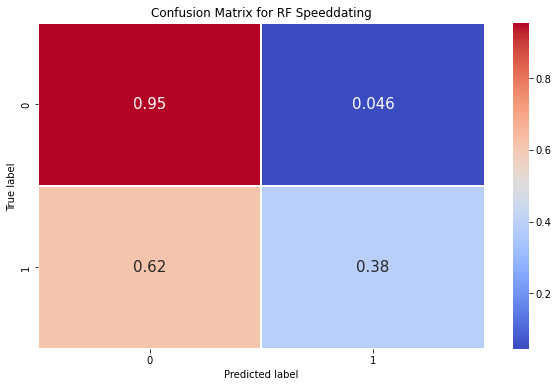

In [14]:
#### Fit the classifier with the optimized parameters
rf_optim = RandomForestClassifier(
    n_estimators=n_estimators_grid,
    max_depth=max_depth_grid,
)

RF_pipeline = Pipeline(steps=[("scaler", scaler), ("rf", rf_optim)])

RF_pipeline.fit(X_train, y_train)

# Predict the unobserved data
y_predict = RF_pipeline.predict(X_test)

# How well did the model do?
print("\nClassification report:\n", classification_report(y_test, y_predict))

# And how does our confusion matrix look like?
matrix = confusion_matrix(y_test, y_predict)
matrix = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 6))

sns.heatmap(
    matrix, annot=True, annot_kws={"size": 15}, cmap=plt.cm.coolwarm, linewidths=0.2
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix for RF Speeddating")
plt.show()

# Based on the classification results the model is pretty accurate
# in predicting that there will be no match (f1 score of 0.92) whereas
# it has a hard time getting the matches right (f1 score of 0.47).

#### What are the important features in this model

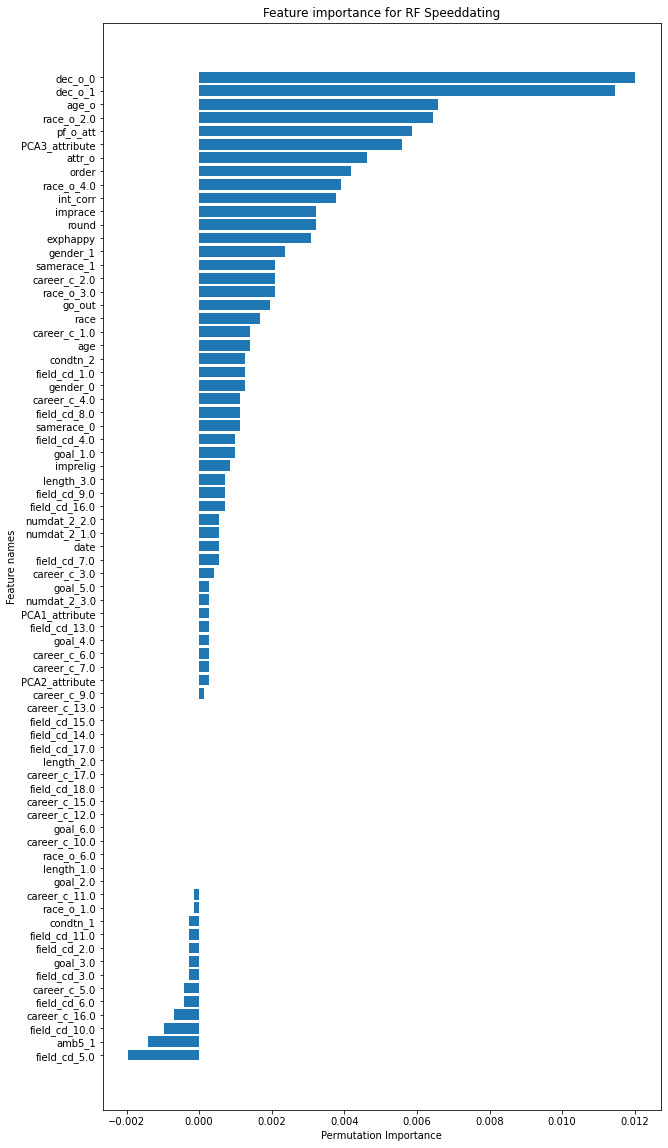

In [15]:
# I'm using a permutation based importance metric instead of the
# default importance build in random forest classifier as it has
# some nice features such as removing the feature and replacing it
# with noise (and thus keeping the number of parameters the same)
perm_importance = permutation_importance(RF_pipeline, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the results
plt.figure(figsize=(10, 20))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature names")
plt.title("Feature importance for RF Speeddating")
plt.show()

# As expected the feature "dec_o_1" "dec_o_0", ie what the other person decides regarding
# whether it is a match or not is the most important feature for predicting whether a
# speed date is a match or not.
# Other features that are important are the age of the partner, that the race of the partner
# is European/Caucasian-American, the initial attribute rating of the partner, and the 3rd PCA
# component based on the attribute ratings of the subject.

## Summary / explanation paragraphs

The succes of speed dating is quantified by the number of matches between partners and how many of those matches are converted into actual dates. As a participant in such events it is therefore crucial to understand which factors make of break a speed date. By using a random forest (RF) classifier model I attempt to predict the outcome of a speed date by using a number of features (e.g., age, ethnicity, shared interests). While there are a number of limitations (e.g., relative low sample size, quality of career and field of study coding and imbalanced data) the RF model is able to successfully predict that the speed date will not successful result in a match. Although conversely, the model is struggling to predict successful matches. 

Factors that influence the outcome of the speed date the most are (unsurprisingly) what the partner decides, the age of the partner, whether the race of the partner is European/Caucasian-American and the initial stated importance of personality attributes by the partner. A somewhat daunting conclusion for the participants as these are all factors outside of their control. 